# Conservation plots

## Preliminaries

### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

## Load and clean data

In [2]:
# Order and name the region and constraint variables
region_order = ["transcript", "nmd_target", "long_exon", "distal_nmd"]
region_labels = ["Full transcript", "NMD target", "Long exon", "Distal"]
constraint_order = ["all", "constrained", "unconstrained"]
constraint_labels = ["All", "Constrained", "Unconstrained"]

In [3]:
metrics = ["phylop", "hmc", "pext"]
paths = [f"../outputs/stats_{x}.tsv" for x in metrics]


def get_stats(path):

    # Read data
    df = pd.read_csv(path, sep="\t")

    # Drop start proximal sites
    df = df[df["region"] != "start_proximal"]

    # Order the data by region
    df["region"] = pd.Categorical(df["region"], categories=region_order, ordered=True)
    df = df.sort_values("region", ascending=False)

    return df


phylop, hmc, pext = [get_stats(p) for p in paths]

In [4]:
col = sns.color_palette("colorblind").as_hex()
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [5]:
colors = [col[-3], col[3], col[0]]

## Horizontal bar plot

In [6]:
def barh_plot(df, metric, xlim):

    fig, axs = plt.subplots(
        3, 1, figsize=(6, 5), layout="constrained", gridspec_kw={"hspace": 0.1}
    )

    # Refresh the subsets
    _all = df[df["constraint"] == "all"]
    cons = df[df["constraint"] == "constrained"]
    nonc = df[df["constraint"] == "unconstrained"]

    n = len(_all)
    y = np.arange(n)

    _x = [x[metric] for x in [_all, cons, nonc]]
    _xerr = [x["ci95"] for x in [_all, cons, nonc]]

    for ax, x, xerr, c, l in zip(axs, _x, _xerr, colors, constraint_labels):
        bars = ax.barh(
            y=y * 1 / n, height=1 / (n + 1), width=x, color=c, label=l, xerr=xerr
        )
        # y ticks have reversed label order (hbar plots low to high)
        ax.set_yticks(ticks=y * 1 / n, labels=reversed(region_labels))
        ax.set_xlim(xlim)
        ax.spines["left"].set_position(("outward", 10))
        # ax.spines["left"].set_visible(False)
        # ax.bar_label(bars, fmt="%.2g", color=c, padding=5)

    for ax in [axs[0], axs[1]]:
        ax.set_xticks([])
        ax.spines[["top", "bottom", "right"]].set_visible(False)
        
    axs[2].spines[["top", "right"]].set_visible(False)

    return fig, [ax for ax in axs]

In [7]:
def label_groups(axs, x, y):
    for ax, c, l in zip(axs, colors, constraint_labels):
        ax.text(
            x,
            y,
            s=l,
            color=c,
            horizontalalignment="left",
            verticalalignment="bottom",
        )

## phyloP

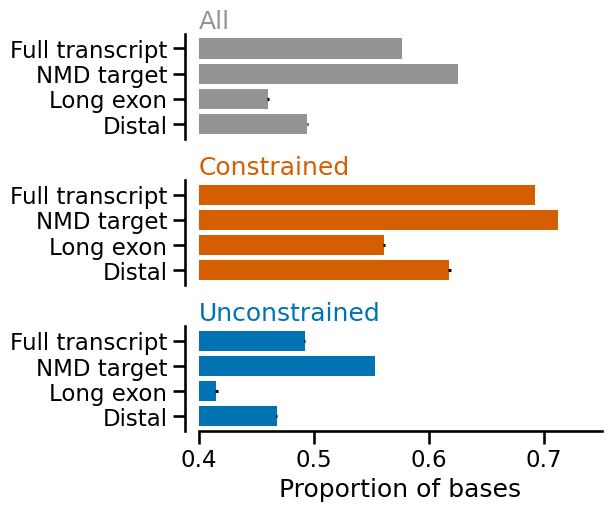

In [8]:
phylop_fig, phylop_axs = barh_plot(phylop, "phylop", xlim=(0.4, 0.75))

# Label groups
label_groups(phylop_axs, x=0.4, y=0.9)

# Set x labels
phylop_axs[2].set_xlabel("Proportion of bases")

# Save figure
plt.savefig("../plots/phylop_region_constraint.svg", format="svg")

## Homologous missense constraint

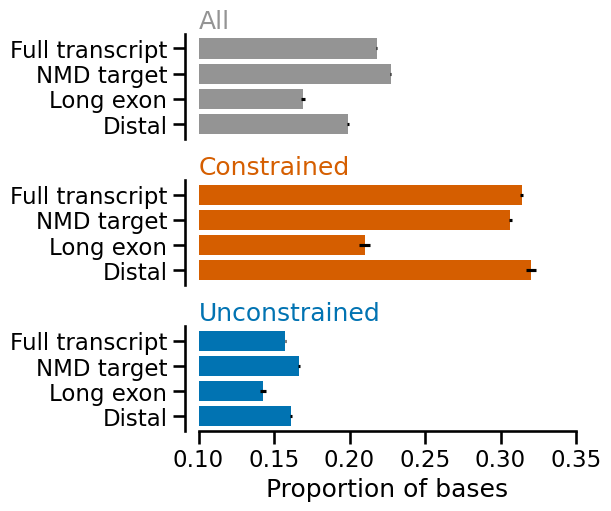

In [9]:
hmc_fig, hmc_axs = barh_plot(hmc, "hmc", xlim=(0.1,0.35))

# Label groups
label_groups(hmc_axs, x=0.1, y=0.9)

# Set x labels
hmc_axs[2].set_xlabel("Proportion of bases")

# Save figure
plt.savefig("../plots/hmc_region_constraint.svg", format="svg")

## Proportion expressed across tissues

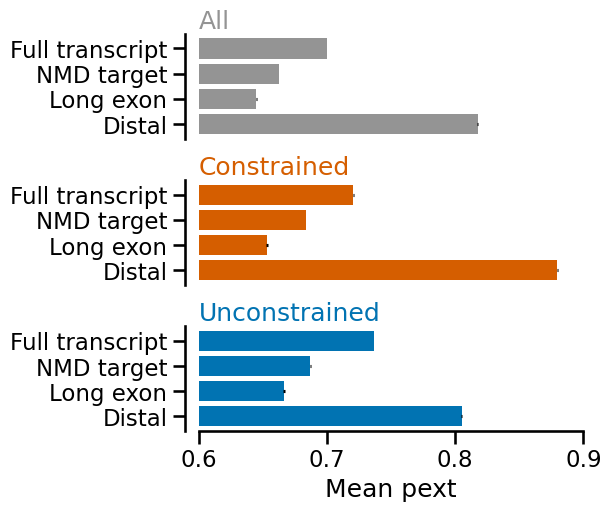

In [10]:
pext_fig, pext_axs = barh_plot(pext, "pext", xlim=(0.6,0.9))

# Label groups
label_groups(pext_axs, x=0.6, y=0.9)

# Set x labels
pext_axs[2].set_xlabel("Mean pext")

# Save figure
plt.savefig("../plots/pext_region_constraint.svg", format="svg")